In [1]:
import pandas as pd 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx



plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
G = nx.Graph() 

In [3]:
df = pd.read_csv('DADOS_CLINCIAS.csv', delimiter=";")

In [4]:
df_ = pd.DataFrame()
df_["source"]  = pd.Series(df.iloc[:, 0])
df_["target"]  = pd.Series(df.iloc[:, 1])
df_["weights"] = pd.Series(df.iloc[:, 2])

In [5]:
df_ = df_.head(df_.shape[0])

In [6]:
df_

,source,target,weights
0,1,1469662,2
1,1,1469662,2
2,1,2426303,2
3,1,2426303,2
4,1,3460658,2
...,...,...,...
7226,4222,73473,4
7227,4222,73473,4
7228,4222,3679092,1
7229,4628,2087097,2


In [7]:
for index, edges in df_.iterrows():
    
    edges = edges["source"], edges["target"], edges["weights"]
    
    G.add_edge(edges[0], edges[1], weight=edges[2])

In [8]:
# nodes = [i for i in df_.source.unique()]
# G.add_nodes_from(nodes)

In [9]:
pos = nx.spring_layout(G)

In [10]:
for n, p in pos.items():
    G.nodes()[n]['pos'] = p

In [11]:
# G.nodes()

In [12]:
# for index, edges in df_.iterrows():
    
#     edges = edges["source"], edges["target"], edges["weights"]
    
#     G.add_edge(edges[0], edges[1], weight=edges[2])

In [13]:
pos = nx.get_node_attributes(G,'pos')

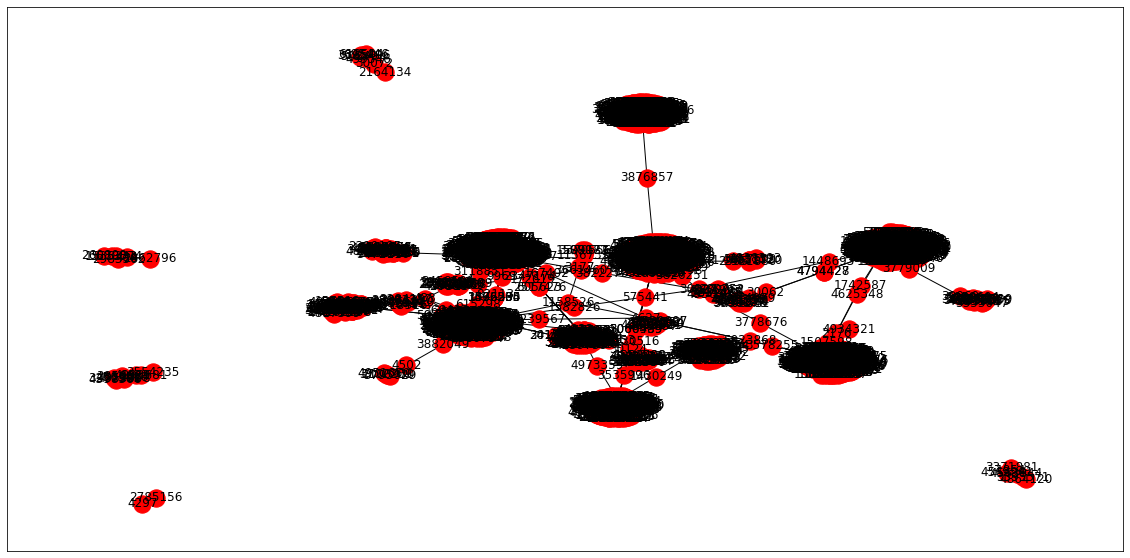

In [14]:
nx.draw_networkx(G, pos=pos, node_color="red", with_labels = True)
plt.savefig('teste.pdf')
plt.show()

In [15]:
df_[df_.target == 5023868]

,source,target,weights
2419,1,5023868,2
2420,1,5023868,2
5824,4627,5023868,1


In [16]:
df_[df_.source == 2176]

,source,target,weights
4668,2176,1507598,2
4669,2176,1507598,2
5643,2176,4934321,2
5644,2176,4934321,2


In [17]:
df_[df_.target == 1507598]

,source,target,weights
2394,1,1507598,2
2395,1,1507598,2
4668,2176,1507598,2
4669,2176,1507598,2


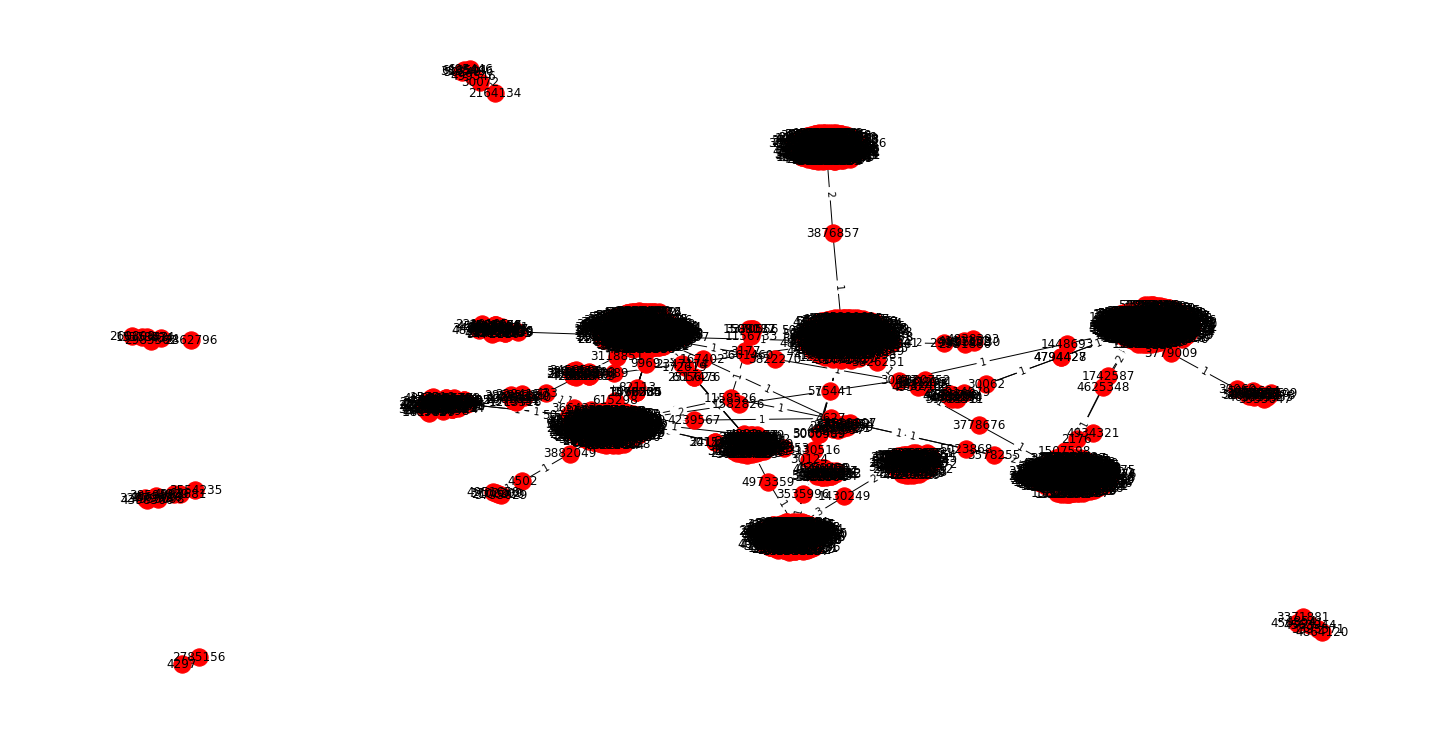

In [18]:
nx.draw(G, pos=pos, node_color="red", with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

In [19]:
print(nx.info(G))
print(G.number_of_nodes())

Graph with 2382 nodes and 2403 edges
2382


In [20]:
# Calcula o grau de centralidade
top = 2
index = 0 
for i in nx.degree_centrality(G).items():
    index = index + 1
    
    if index > top:
        break 
    print("Node:", i[0], " Degree Centrality:", i[1])

Node: 1  Degree Centrality: 0.12893742125157498
Node: 1469662  Degree Centrality: 0.00041999160016799666


In [29]:
# Calcula o menor caminho entre dois vértices(nodes) 

In [22]:
def path_nodes(source, destination, path_list=[]):
    try: 
        path = [str(i) + " -->" for i in nx.shortest_path(G, source, destination)]
        path_list = path[:-1]
        last_node = path[-1].split("-->")[0].strip()
        path_list.append(last_node)
        print(path_list)
    except Exception as e:
        print(e)

In [23]:
source = 1507598
destination = 4627

In [24]:
path_nodes(source, destination)

['1507598 -->', '1 -->', '3578255 -->', '4627']


In [25]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes()[edge[0]]['pos']
    x1, y1 = G.nodes()[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [26]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes()[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [27]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = "Node: " + str(adjacencies[0]) +' # de conexões: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

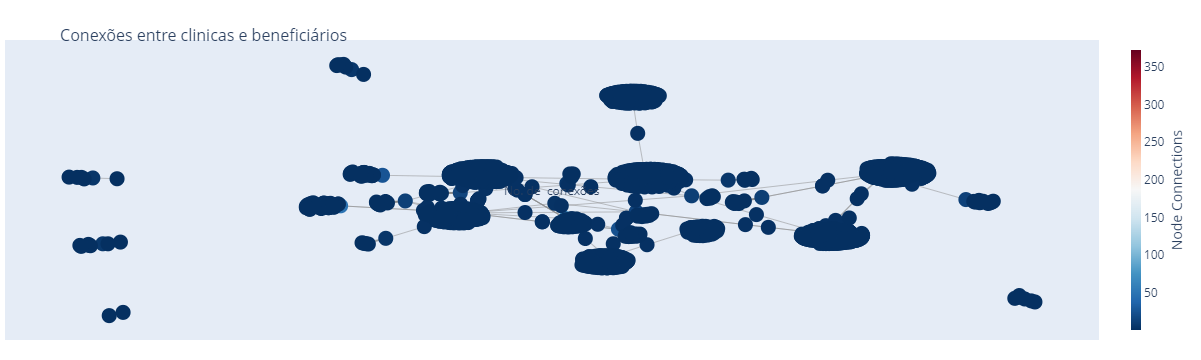

In [35]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Conexões entre clinicas e beneficiários',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. de  conexões",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

#iplot(fig)
fig.show()

In [37]:
source = 3779009
destination = 1
path_nodes(source, destination)

['3779009 -->', '5 -->', '1742587 -->', '1']


In [41]:
for i in G.nodes():
    if i == 1742587:
        print(i)

1742587
